# Working with time series, frequency series, and unit conversion

In this notebook, we show some of the most useful features of the [timeseries](../series.rst) module. To do so, we will analyze a fake gravitational-wave signal. We will also show the [frequencyseries](../series.rst) module and the [unitconv](../unitconv.rst) modules.

First, let's generate this signal. 

(This notebook is meant to be converted in Sphinx documentation and not used directly.)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from kuibit import timeseries as ts
from kuibit import series
from kuibit import unitconv as uc
from kuibit.gw_utils import luminosity_distance_to_redshift

%matplotlib inline

In [2]:
t = np.linspace(0, 20, 5000)
y = np.sin(t)

# Generate a TimeSeries by providing the times and the values of the series
gw = ts.TimeSeries(t, y)

To access the times and the values, use ``gw.t`` and ``gw.y``. You can also iterate over the series with a for loop yielding the elements `(t, y)` at each iteration of the loop. For example.

In [3]:
for tt, yy in gw:
    print(tt, yy)

0.0 0.0
0.004000800160032006 0.004000789486971321
0.008001600320064013 0.008001514935783532
0.012002400480096018 0.012002112309302542
0.016003200640128026 0.016002517572444287
0.020004000800160033 0.020002666693199687
0.024004800960192037 0.024002495643659576
0.028005601120224044 0.028001940401039562
0.03200640128025605 0.03200093694870479
0.03600720144028806 0.03599942127719461
0.040008001600320066 0.03999732938524717
0.04400880176035207 0.0439945972808238
0.048009601920384073 0.04799116098213332
0.05201040208041608 0.05198695651865616
0.05601120224044809 0.055981919932168285
0.060012002400480095 0.059975987277764924
0.0640128025605121 0.06396909462488413
0.0680136027205441 0.06796117805833003
0.07201440288057612 0.07195217367929596
0.07601520304060812 0.07594201760638712
0.08001600320064013 0.07993064597664322
0.08401680336067213 0.08391799494656059
0.08801760352070415 0.08790400069311417
0.09201840368073615 0.09188859941477902
0.09601920384076815 0.09587172733255157
0.10002000400080

2.65253050610122 0.46979818323153927
2.656531306261252 0.46626263101610743
2.660532106421284 0.4627196156235579
2.664532906581316 0.4591691937647434
2.668533706741348 0.4556114222690675
2.67253450690138 0.45204635808357463
2.676535307061412 0.44847405827203896
2.680536107221444 0.44489458001405074
2.684536907381476 0.44130798060410126
2.6885377075415082 0.4377143174506656
2.6925385077015402 0.4341136480752838
2.6965393078615723 0.43050603011164024
2.7005401080216043 0.426891521304641
2.7045409081816363 0.4232701795094896
2.7085417083416683 0.419642062690761
2.7125425085017003 0.4160072289214737
2.7165433086617323 0.4123657363821604
2.7205441088217643 0.4087176433599365
2.7245449089817964 0.4050630082475672
2.7285457091418284 0.4014018895425331
2.7325465093018604 0.39773434584609335
2.7365473094618924 0.3940604358623482
2.7405481096219244 0.39038021839729903
2.7445489097819564 0.38669375235790715
2.7485497099419884 0.3830010967511509
2.7525505101020205 0.37930231068308135
2.756551310262

5.489097819563913 -0.7132242892926094
5.493098619723945 -0.7104142843080594
5.497099419883977 -0.7075929081621123
5.501100220044009 -0.7047602060147884
5.505101020204041 -0.7019162232073964
5.509101820364073 -0.6990610052618075
5.513102620524105 -0.6961945978797266
5.517103420684137 -0.6933170469419611
5.521104220844169 -0.6904283985076866
5.525105021004201 -0.687528698813709
5.529105821164233 -0.6846179942737255
5.533106621324265 -0.6816963314775805
5.537107421484297 -0.6787637571905205
5.541108221644329 -0.6758203183524457
5.545109021804361 -0.6728660620771585
5.549109821964393 -0.6699010356516089
5.553110622124425 -0.6669252865351383
5.557111422284457 -0.6639388623587196
5.561112222444489 -0.6609418109241947
5.565113022604521 -0.6579341802035094
5.569113822764553 -0.6549160183379458
5.573114622924585 -0.651887373637351
5.577115423084617 -0.6488482945793651
5.581116223244649 -0.6457988298086439
5.585117023404681 -0.642739028136081
5.589117823564713 -0.6396689385380264
5.5931186237247

0.8699515314920232
8.37367473494699 0.8679716308376932
8.377675535107022 0.865977837099116
8.381676335267054 0.8639701821897129
8.385677135427086 0.8619486982447725
8.389677935587118 0.859913417620936
8.39367873574715 0.8578643728956797
8.397679535907182 0.8558015968667934
8.401680336067214 0.8537251225518551
8.405681136227246 0.8516349831877029
8.409681936387278 0.849531212229903
8.41368273654731 0.8474138433522139
8.417683536707342 0.8452829104460479
8.421684336867374 0.8431384476199277
8.425685137027406 0.8409804891989416
8.429685937187438 0.8388090697241934
8.43368673734747 0.8366242239522497
8.437687537507502 0.834425986854583
8.441688337667534 0.8322143936170132
8.445689137827566 0.8299894796391433
8.449689937987598 0.827751280533793
8.45369073814763 0.8254998321264291
8.457691538307662 0.8232351704545916
8.461692338467694 0.8209573317673171
8.465693138627726 0.8186663525245585
8.469693938787758 0.8163622693966016
8.47369473894779 0.8140451192634776
8.477695539107822 0.8117149392


10.994198839767954 -0.9999990540718289
10.998199639927986 -0.9999965537644626
11.002200440088018 -0.9999780471316879
11.00620124024805 -0.9999435344697291
11.010202040408082 -0.9998930163310089
11.014202840568114 -0.99982649352414
11.018203640728146 -0.9997439671139116
11.022204440888178 -0.9996454384212728
11.02620524104821 -0.9995309090233117
11.030206041208242 -0.9994003807532289
11.034206841368274 -0.99925385570031
11.038207641528306 -0.9990913362098905
11.042208441688338 -0.9989128248833195
11.04620924184837 -0.998718324577917
11.050210042008402 -0.9985078384069288
11.054210842168434 -0.998281369739477
11.058211642328466 -0.9980389222005049
11.062212442488498 -0.9977804996707205
11.06621324264853 -0.9975061062865328
11.070214042808562 -0.9972157464399869
11.074214842968594 -0.9969094247786929
11.078215643128626 -0.9965871462057521
11.082216443288658 -0.9962489158796777
11.08621724344869 -0.9958947392143133
11.090218043608722 -0.9955246218787451
11.094218843768754 -0.9951385697972


13.686737347469494 0.9002601608228767
13.690738147629526 0.9019947088558932
13.694738947789558 0.9037148192183275
13.69873974794959 0.9054204643774386
13.702740548109622 0.9071116170320209
13.706741348269654 0.9087882501128414
13.710742148429686 0.9104503367830729
13.714742948589718 0.9120978504387237
13.71874374874975 0.9137307647090631
13.722744548909782 0.9153490534570441
13.726745349069814 0.9169526907797209
13.730746149229846 0.9185416510086643
13.734746949389878 0.9201159087103721
13.73874774954991 0.9216754386866766
13.742748549709942 0.9232202159751473
13.746749349869974 0.9247502158494909
13.750750150030006 0.9262654138199475
13.754750950190038 0.9277657856336815
13.75875175035007 0.9292513072751708
13.762752550510102 0.9307219549665905
13.766753350670134 0.932177705168194
13.770754150830166 0.9336185345786897
13.774754950990198 0.9350444201356135
13.77875575115023 0.9364553390156988
13.782756551310262 0.9378512686352408
13.786757351470294 0.9392321866504588
13.79075815163032

16.57131426285257 -0.7600246184679607
16.575315063012603 -0.7626186260621458
16.579315863172635 -0.7652004268923723
16.583316663332667 -0.7677699796333536
16.5873174634927 -0.7703272431558505
16.59131826365273 -0.77287217652733
16.595319063812763 -0.7754047390126199
16.599319863972795 -0.7779248900745612
16.603320664132827 -0.7804325893746572
16.60732146429286 -0.7829277967737183
16.61132226445289 -0.7854104723325052
16.615323064612923 -0.7878805763123683
16.619323864772955 -0.7903380691758831
16.623324664932987 -0.7927829115874836
16.62732546509302 -0.7952150644140917
16.63132626525305 -0.7976344887257438
16.635327065413083 -0.8000411457962135
16.639327865573115 -0.8024349971036319
16.643328665733147 -0.8048160043311037
16.64732946589318 -0.8071841293673213
16.65133026605321 -0.8095393343071742
16.655331066213243 -0.8118815814523557
16.659331866373275 -0.8142108333119665
16.663332666533307 -0.8165270526031151
16.66733346669334 -0.8188302022515138
16.67133426685337 -0.8211202453920731


 0.8923089871399514
19.955991198239648 0.8941079028396118
19.95999199839968 0.8958925071079088
19.963992798559712 0.897662771379787
19.967993598719744 0.8994186673197229
19.971994398879776 0.9011601668221778
19.975995199039808 0.9028872420120478
19.97999599919984 0.9045998652451104
19.983996799359872 0.9062980091084663
19.987997599519904 0.9079816464209782
19.991998399679936 0.909650750233707
19.995999199839968 0.9113052938303416
20.0 0.9129452507276277


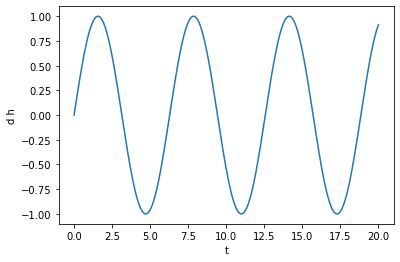

In [4]:
def plot(ser, lab1="d h", lab2="t", *args, **kwargs):
    """Plot Series ser with labels"""
    plt.ylabel(lab1)
    plt.xlabel(lab2)
    plt.plot(ser, *args, **kwargs)
    
plot(gw)

Let's make this more interesting: we square the signal and add Gaussian noise. [TimeSeries](../timeseries_ref.html#kuibit.timeseries.TimeSeries) support directly using all the basic mathematical operations in Python and NumPy, so we can easily square the signal and add another TimeSeries to it.

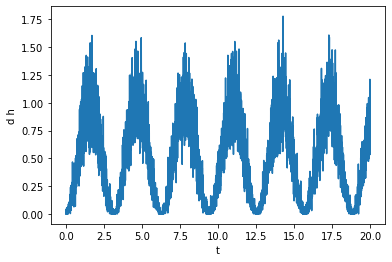

In [5]:
noise = np.random.normal(0, 0.1, len(gw))  # Here we used len() on the TimeSeries
noise_ts = ts.TimeSeries(t, noise)

gw += noise_ts
gw **= 2

plot(gw)

To analyze this signal, first we will smooth it. To do that, we will use the [savgol_smooth_time](../timeseries_ref.html#kuibit.timeseries.TimeSeries.savgol_smooth_time) method, which is a generalized "running average" filter. This method requires length of time over which we want to smooth the data.

In [TimeSeries](../timeseries_ref.html#kuibit.timeseries.TimeSeries) there are always two different methods to do the same task, one with imperative verb (e.g., smooth), and the other with the past tense (e.g., smoothed). The first modifies the data, the second returns a new `TimeSeries` with the operation applied. Here, we will find what smoothing length to use by trial and error, so we will use the second method. 

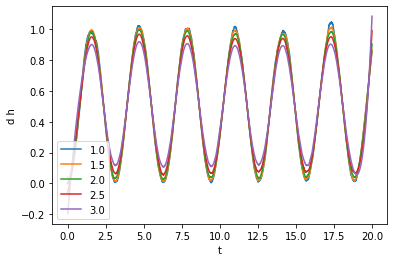

In [6]:
tsmooth = np.linspace(1, 3, 5)

for tsm in tsmooth:
    smoothed = gw.savgol_smoothed_time(tsm)
    plot(smoothed, label=tsm)
plt.legend()

From visual inspection it looks like that ``tsmooth = 1.5`` will work yield a clean series faithful to the original one.

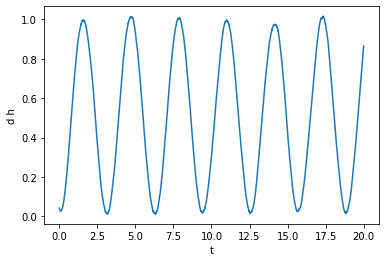

In [7]:
gw.savgol_smooth_time(1.5)
plot(gw)

Next, for fun, we can compute integrals and derivatives. For instance, we can compute what is the integral from 5 to 10.

The integral from 5 to 10 is 2.1862


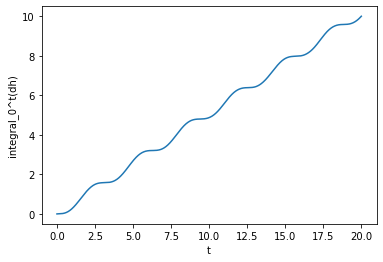

In [8]:
gw_int = gw.integrated()
a = 5
b = 10
print(f"The integral from {a} to {b} is {gw_int(b) - gw_int(a):.4f}")
plot(gw_int, lab1="integral_0^t(dh)")

Here, we showed a very powerful feature of `TimeSeries`: you can call them on a specific time (as we did we ``gw_int(b)``). This is done using splines to interpolate to the points that are not available. Splines can also be used to take derivatives. Alternatively, one can simply take the finite (central) difference. Let's see what's the derivative of ``gw`` using splines and finite difference.

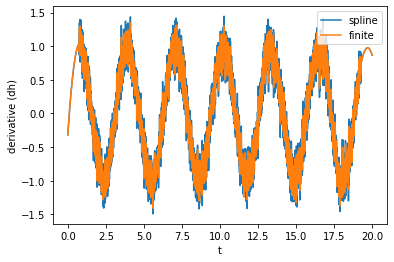

In [9]:
gw_spline_der = gw.spline_differentiated()
gw_numer_der = gw.differentiated()

plot(gw_spline_der, label='spline')
plot(gw_numer_der, lab1="derivative (dh)", label='finite')
plt.legend()

Clearly, derivatives will be noisier than the actual data, so often it is convenient to smooth them out as shown before.

TimeSeries support complex signals. Now, we will create one using `gw` itself. We will copy `gw`, time-shift it, find the common time interval with the original `gw`, and use that as a the imaginary part.

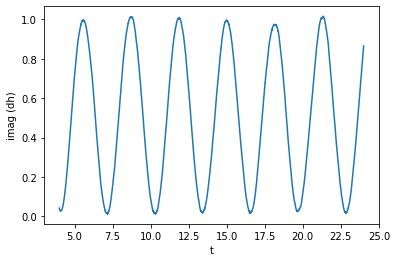

In [10]:
gw_imag = gw.copy()  # It is important to deep copy the object
gw_imag.time_shift(4)

plot(gw_imag, lab1 ="imag (dh)")

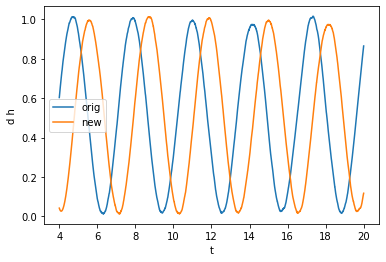

In [11]:
gw, gw_imag = series.sample_common([gw, gw_imag], resample=True)  # Resampling to common times

plot(gw, label="orig")
plot(gw_imag, label="new")
plt.legend()

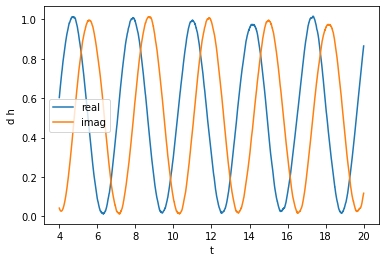

In [12]:
gw_complex = ts.TimeSeries(gw.t, gw.y + 1j * gw_imag.y)

plot(gw_complex.real(), label="real")
plot(gw_complex.imag(), label="imag")
plt.legend()

We can also compute the phase and absolute value. In particular, we will compute the unfolded phase (no wrapping over $2\pi$)

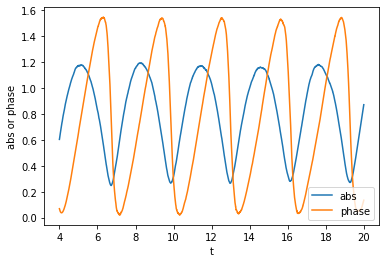

In [13]:
plot(gw_complex.abs(), label='abs')
plot(gw_complex.unfolded_phase(), lab1="abs or phase", label='phase')
plt.legend()

Here, the unfolded phase looks a little bit unusual. This is because we made up the signal.

We can also compute the frequency of the phase, which we can directly smooth.

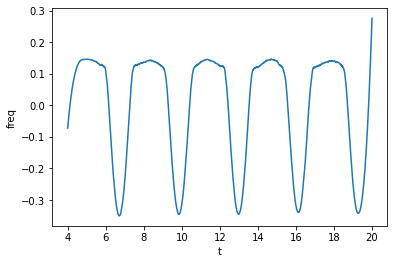

In [14]:
plot(gw_complex.phase_frequency(tsmooth=1.5), lab1="freq")

Next, we will take a Fourier transform. Before, let's pretend that the signal was in geometrized units (as in simulations), and let's make it physical assuming a scale of $M = 1 M_\odot$. For that, use the [unitconv](../unitconv.rst) module. We define a CU object that knows how to convert units.

In [15]:
CU = uc.geom_umass_msun(1) 

# How to convert from geometrized length to physical length?
# Simply multiply times CU.length. Let's check that it is 1.477 km
CU.length  # m

1476.6436994724972

Now we rescale `gw`, assuming that `y` is strain times distance (as usually is). Let's assume a distance of 500 Mpc.

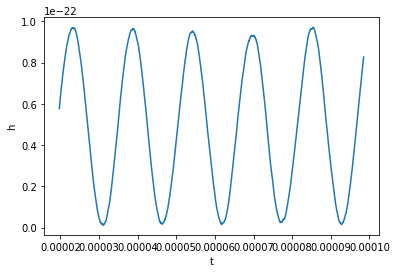

In [16]:
d_Mpc = 500

# inverse = True means from geometrized to physical
gw_physical = gw_complex.time_unit_changed(CU.time, inverse=True)  

gw_physical *= CU.length  # dh -> dh physical
# Now just the strain, since we assume a distance
gw_physical /= (d_Mpc * uc.MEGAPARSEC_SI)

# We have to manually add the redshift
gw_physical.redshifted(luminosity_distance_to_redshift(d_Mpc))

plot(gw_physical.real(), lab1="h")

Okay, now before taking the Fourier transform, we will remove the mean and window our signal. A Tukey window will work.

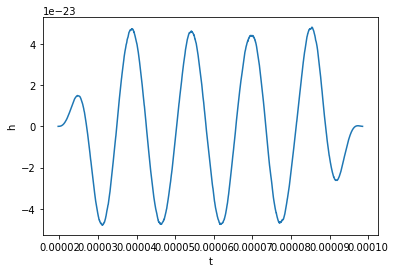

In [17]:
gw_physical.mean_remove()
gw_physical.tukey_window(0.3)
plot(gw_physical.real(), lab1="h")

Finally, we can take the Fourier transform. This is easy to do:

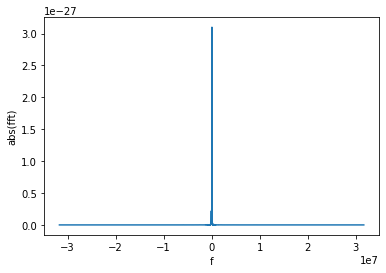

In [18]:
gw_fft = gw_physical.to_FrequencySeries()

# Plotting the amplitude of the Fourier transform
plot(gw_fft.abs(), lab1="abs(fft)", lab2="f")

The new object is a `FrequencySeries`. It is very similar to a `TimeSeries` and it shares several properties, methods, and features. 

Let's restrict to only positive frequencies close to zero.

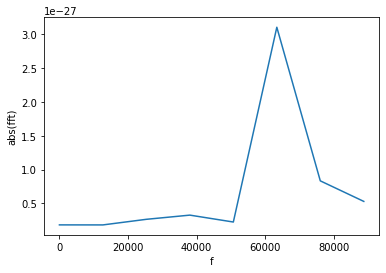

In [19]:
gw_fft.crop(0, 1e5)
plot(gw_fft.abs(), lab1="abs(fft)", lab2="f")

We can find the frequency of that peak! For this, we find all the peaks with amplitude larger than 1e-27.

Frequency: 64181.52


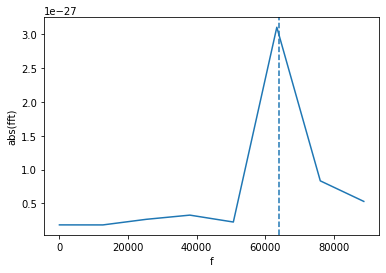

In [20]:
f_peak = gw_fft.peaks_frequencies(1e-27)[0]

print(f"Frequency: {f_peak:.2f}")
plot(gw_fft.abs(), lab1="abs(fft)", lab2="f")
plt.axvline(f_peak, ls = 'dashed')

The line is not on the maximum because we use a quadratic interpolation to find a more accurate location of the peak.

Sometimes, it is useful to ignore some data (or example, when we know that the data is invalid). `Series` objects support _masks_ to mark the points we want to ignore. Most functions work transparently with masks: for example, if you ask for the mean of a `Series`, the masked point will be ignored. Other functions do not support masks (most notably, splines). In that case, it is best to completely remove the masked points and work with clean data.

In [21]:
# Let's mask all the point in the spectrum with value larger than 1e-27

spectrum = gw_fft.abs()

print(f"Maximum without mask {spectrum.max():.3e}")

# Apply mask
spectrum.mask_greater(1e-27)

print(f"Maximum with mask {spectrum.max():.3e}")

print(f"Length with mask {len(spectrum)}")

# Remove points
spectrum.mask_remove()

print(f"Length after having removed the masked points {len(spectrum)}")

Maximum without mask 3.100e-27
Maximum with mask 8.339e-28
Length with mask 8
Length after having removed the masked points 7
